In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

import calculations as calc

In [2]:
print(calc.calculate_pointwise_similarity.__doc__)


    Calculate point-wise similarity of all points on a map to a reference point over time

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, longitude, latitude
        lon (int): Longitude of reference point
        lat (int): Latitude of reference point
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
        sim_func (str, optional): The similarity function that should be used.
            Defaults to Correlation Coefficient.
            Options: "correlation": Pearson's Correlation,
                     "manhattan": Mahattan Distance,
                     "mahalanobis": Mahalanobis Distance,
                     "euclidean": Euclidean Distance,
                     "cosine": Cosine Distance,
                     "mutual_information": Mutual Information

    Returns:
        2 dimensional numpy.ndarray with similarity values to reference point
    


In [3]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [4]:
#Choose a random point on the map
(lon, lat) = (np.random.randint(256), np.random.randint(512))
(lon, lat)

(31, 410)

In [5]:
#Define Level
level = 15

In [6]:
#Convert map in Array
map_array = np.array(nc.variables["u"][:, :, :, :])
map_array.shape

(12, 37, 256, 512)

In [7]:
#Calculate point-wise similarities to (lon, lat) (Here: Correlation Coefficient)
sim = calc.calculate_pointwise_similarity(map_array, lon, lat, level, sim_func="correlation")     
            
sim        

array([[ 0.2715301 ,  0.27757181,  0.28345548, ...,  0.25230802,
         0.25889773,  0.26530666],
       [ 0.31644184,  0.32248455,  0.32834499, ...,  0.29725264,
         0.30383598,  0.31022853],
       [ 0.35284056,  0.35910255,  0.36521418, ...,  0.33295385,
         0.33974124,  0.34638649],
       ...,
       [-0.10191117, -0.0945168 , -0.08730461, ..., -0.12522414,
        -0.11726372, -0.10951675],
       [-0.12311715, -0.11544356, -0.10790941, ..., -0.14729659,
        -0.13903794, -0.13099081],
       [-0.14963893, -0.1418629 , -0.13422585, ..., -0.17409594,
        -0.16573685, -0.15759457]])

In [8]:
#2nd possibility: Convert point values into series and calculate series similarity
reference_series = np.array([map_array[time, level, lon, lat] for time in range(map_array.shape[0])])
sim = calc.calculate_series_similarity(map_array, reference_series, level, sim_func="correlation")

sim

array([[ 0.2715301 ,  0.27757181,  0.28345548, ...,  0.25230802,
         0.25889773,  0.26530666],
       [ 0.31644184,  0.32248455,  0.32834499, ...,  0.29725264,
         0.30383598,  0.31022853],
       [ 0.35284056,  0.35910255,  0.36521418, ...,  0.33295385,
         0.33974124,  0.34638649],
       ...,
       [-0.10191117, -0.0945168 , -0.08730461, ..., -0.12522414,
        -0.11726372, -0.10951675],
       [-0.12311715, -0.11544356, -0.10790941, ..., -0.14729659,
        -0.13903794, -0.13099081],
       [-0.14963893, -0.1418629 , -0.13422585, ..., -0.17409594,
        -0.16573685, -0.15759457]])

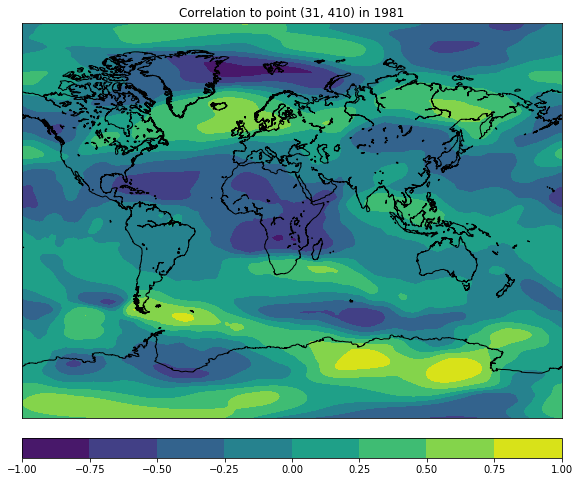

In [9]:
#Plot similarity on map
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, sim[:, :]) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("Correlation to point ({}, {}) in 1981".format(lon, lat))
plt.show()